# Data Science 101

<i>House Price practical -- Introduction to Data Science</i>

In this practical, you will familiarize yourself with data exploration, visualization and analysis techniques using Python. It will take you through the basics of several key steps in the data science process. Running the cell below imports the necessary modules and functions, which we will use throughout the rest of this notebook.

In [1]:
# Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Initial Exploration: Correlation and Visualization

You will investigate a dataset listing several features of houses, including their sale price.

After getting a feel for the information these features contain, you will use a simple regression model to predict this sale price. Begin by importing the data from the provided CSV file. Refer to your cheatsheet for the correct syntax.

In [151]:
# Import the 'HousePrices.csv' file into a Pandas DataFrame.
# Hint: First inspect the file to find what delimiter it uses!

housePricesDF = pd.read_csv('HousePrices.csv', delimiter=';')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


As is commonly the case with data of this nature, rows represent observations (houses) and columns represent the features in terms of which they are described.

Use the next two cells to <i>i)</i> print the names of the dataset's features and <i>ii)</i> print the first 10 rows. As before, refer to your cheatsheet for syntax.

In [3]:
# Print the imported dataframe's column headers
print(housePricesDF.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Print the dataframe's first 10 rows
print(housePricesDF.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

Some, but not all column names are self-explanatory. For the sake of clarity, we provide each feature's description below:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


<i>SalePrice</i> is our main feature of interest. Use the <b>.describe()</b> method to print a table summarizing some key statistics of the distribution of these prices.

In [5]:
# Describe the distribution of sale prices
housePricesDF['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

What do these numbers represent? Briefly describe what the value in each row indicates in the cell below.

<i>Note: The next cell is a <u>Markdown</u> cell, which Jupyter interprets as (formatted) text instead of executable Python code!</i>

***
```
Answer:
count tells how many records (houses) exist in the dataframe
mean shows the average price of the houses
std stands for standard diviation
min indicates the minimum price
25%, 50%, 75% are the qurtiles
max is the maximum price in the dataset

```
***

A more intuitive way to summarize the sale prices in our dataset, is to visualize their distribution in a plot. The Seaborn module we imported at the start of this notebook (<b>import seaborn as sns</b>) has a function that does just that. Use your cheatsheet to find it, and run it below.

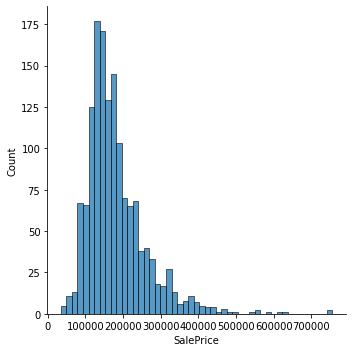

In [6]:
# Plot the distribution of the SalePrice data
sns.displot(housePricesDF['SalePrice'])

Notice that the distribution clearly is <b>not</b> normal; it leans left, also called "right skewed."

Carefully examine the list of features this dataset contains. Choose two quantitative features (that is, not qualitative / categorical) which you suspect correlate with <i>SalePrice</i>. Make two scatter plots, to visualize whether or not there is indeed a correlation between the sale price and your chosen features.

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

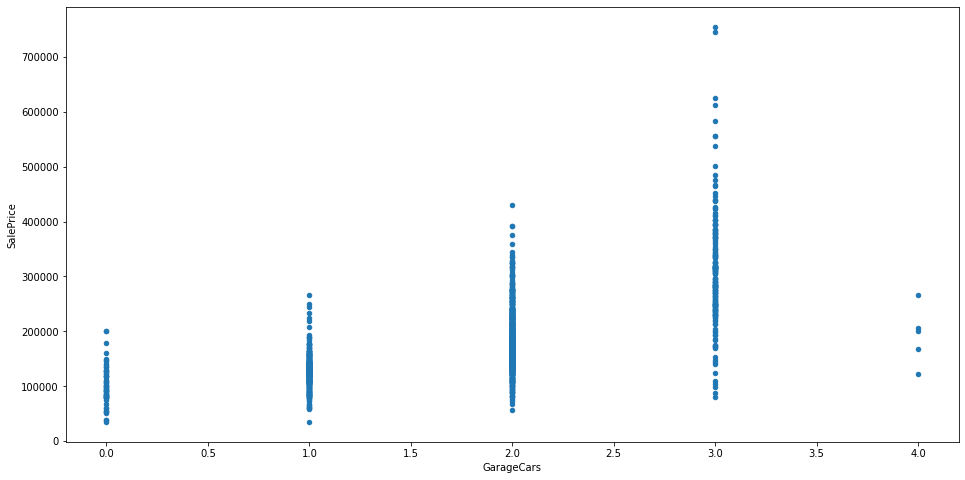

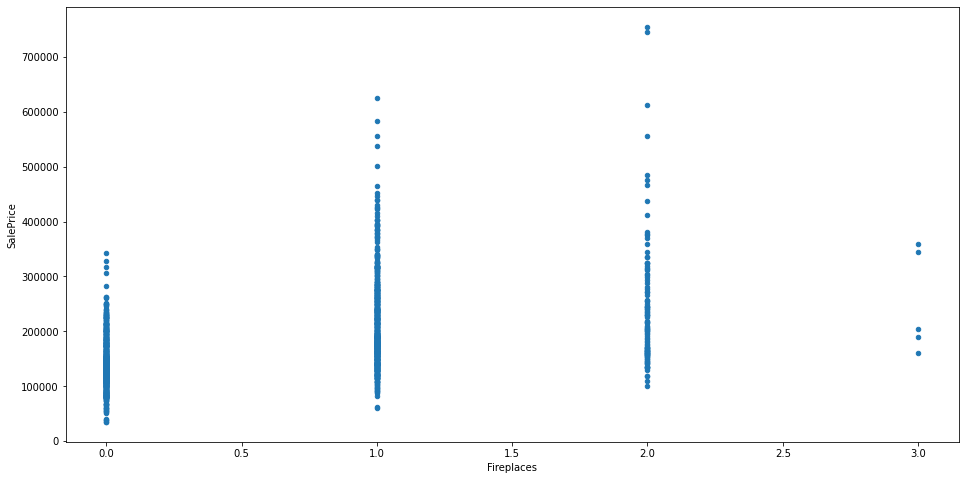

In [7]:
# Plot SalePrice versus two other quantitative features, in separate scatter plots
housePricesDF.plot.scatter(y='SalePrice', x='GarageCars')

housePricesDF.plot.scatter(y='SalePrice', x='Fireplaces')

Describe your produced graphs. What stands out? Do your chosen features seem to have any predictive power for <i>SalePrice</i>? Is the relationship positive? Linear? Monotonic?

<i>Note: The next cell is a <u>Markdown</u> cell again!</i>

***
```
Answer:
The first graph correlates SalePrice with the house's car garage capicity. We can see a clear, positive correlation between the two. In other words, the more cars a house can fit, the more expensive it tends to be. The correlation does not continue after the 3ed car, but since these are just a few outliers they shouldn't have much gravity in our judgment.

A similar pattern appears in the the second graph where the house price is in correlation with the number of fireplaces present in the house. Surprisingly there is a positive, but not strong correlation between the two.

```
***


The scatter plots are just one of many ways to visualize whether or not correlation exists between two variables. 

Combine the dataframe's <b>.corr()</b> method to calculate correlation coefficients between specified columns (<i>SalePrice</i> and the two variables you selected), with the <b>heatmap()</b> function from Seaborn to plot a correlation matrix.

<i>Bonus question: What does the chosen correlation method assume about the distribution of its input variables? What other methods does <b>.corr()</b> provide, and when are these appropriate to use?</i>

,SalePrice,GarageCars,Fireplaces
SalePrice,1.000000,0.570989,0.412829
GarageCars,0.570989,1.000000,0.289536
Fireplaces,0.412829,0.289536,1.000000


,SalePrice,GarageCars,Fireplaces
SalePrice,1.000000,0.641438,0.466929
GarageCars,0.641438,1.000000,0.290903
Fireplaces,0.466929,0.290903,1.000000


,SalePrice,GarageCars,Fireplaces
SalePrice,1.000000,0.688377,0.519247
GarageCars,0.688377,1.000000,0.316346
Fireplaces,0.519247,0.316346,1.000000


<AxesSubplot:>

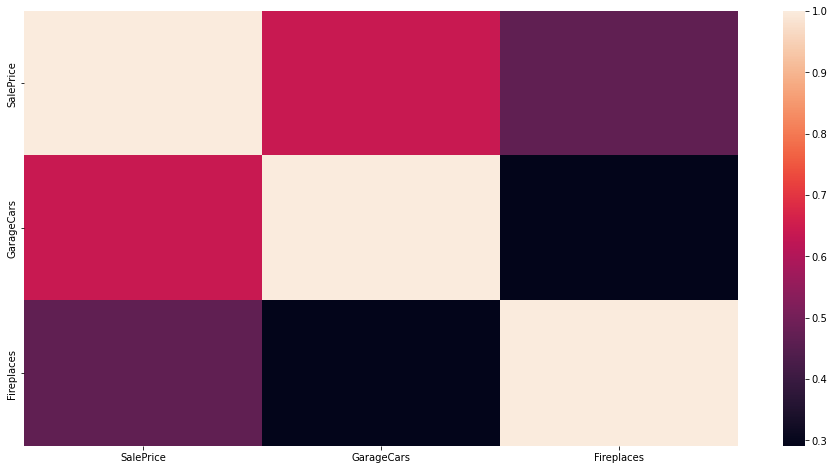

In [8]:
# cols = ['SalePrice', ...]
# corrmat = ... .corr()
# sns.heatmap(corrmat, square=True, annot=True)
from IPython.display import display


cols1 = ['SalePrice', 'GarageCars', 'Fireplaces']

priceCarsCorrP = housePricesDF[cols1].corr(method='pearson')
priceCarsCorrK = housePricesDF[cols1].corr(method='kendall')
priceCarsCorrS = housePricesDF[cols1].corr(method='spearman')

display(priceCarsCorrK)
display(priceCarsCorrP)
display(priceCarsCorrS)

sns.heatmap(priceCarsCorrP)

#corr() provides the ability to choose between 3 different types of correnlation coefficient methods. Pearson which assumes
# continious variables without outliers, and linearity / homoscedasticity. Then we can choose between Kendall's and Spearmans'set
# methods that both assume independant, non-nominal variables and a monotonic relationship between them (no the case for this dataset)


Next, choose a categorical (qualitative) variable, either nominal or ordinal, which you suspect influences a house's sale price.

Instead of a scatter plot, box-and-whisker plots can be insightful to visualize a quantitative variable's distribution versus individual categories of a categorical variable. Create and describe such a boxplot for <i>SalePrice</i> versus your chosen variable in the cells below.

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

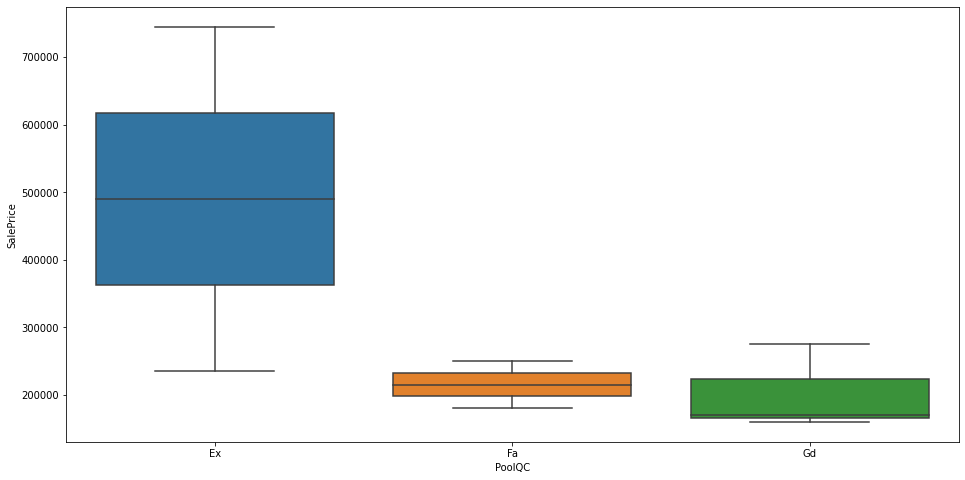

In [9]:
# Create a boxplot for your chosen variable

sns.boxplot(x=housePricesDF['PoolQC'], y=housePricesDF['SalePrice'])

If your variable spans too many categories, the plot above may have turned into a gigantic, illegible rainbow. Consider rerunning the previous cell with a different variable if this is the case.

What do the boxes, whiskers, centerlines and dots represent? Is there a convincing pattern relating the categories to <i>SalePrice</i>?

***
```
Answer:
Looking at a box with whiskers, we can tell the maximum and minimum values at the end of the whiskers. The median value is represented by the line within the box, and the 25th and 75th quartiles are shown as the edges of the box (where the whiskers start)

As for this particular dataset, we can see a positive correlation as the pool quality increases. Exceptional pool quality properties have a wide range of prices and average at nearly 50,000€. The rest two categories are very narrow in ranges and substantially more affordable.

```
***


Time to scale things up. Create a correlation matrix for the <i>entire</i> dataset, and visualize it with a heatmap as before.

<AxesSubplot:>

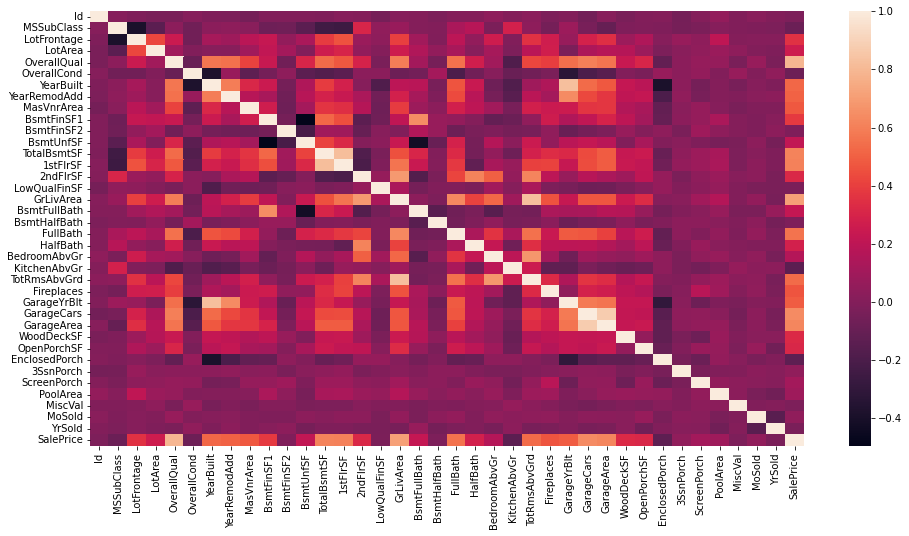

In [10]:
# Make a heatmap of the correlation matrix for your entire dataset.
allDSCorr = housePricesDF.corr()

sns.heatmap(allDSCorr)

Carefully study your correlation matrix.

Choose a variable that doesn't seem to correlate with anything. Can you explain why not?

The heatmap has fewer rows and columns than there are features in your dataset. Which features are missing? Why?

<i>Bonus question: Seaborn provides a function that clusters rows and columns of your correlation matrix together. Find the function that does this instead of <b>heatmap()</b>, and rerun the previous cell. Identify some of the pairs of features that strongly correlate, and explain why you think this does or does not make sense.</i>

***
```
Answer:
One of the virables that don't correlate with anythings is Id. This is because Id is not an actual data point, but rather the identification number for each record in the dataset.

#TODO why does this have fewer collumns?

```
***

Zoom in on the 10 features which most strongly correlate with <i>SalePrice</i>. Include the correlation coefficients between every pair of features in your heatmap using annotations.

Hint: Look up the <i>annot</i>, <i>fmt</i> and <i>annot_kws</i> keyword arguments for the <b>heatmap()</b> function in the online Seaborn documentation.

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.790982,0.708624,0.641438,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897
OverallQual,0.790982,1.000000,0.593007,0.599474,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323
GrLivArea,0.708624,0.593007,1.000000,0.471447,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010
GarageCars,0.641438,0.599474,0.471447,1.000000,0.871561,0.437381,0.444581,0.472898,0.368570,0.534022
GarageArea,0.623431,0.562022,0.468997,0.871561,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954
TotalBsmtSF,0.613581,0.537808,0.454868,0.437381,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452
1stFlrSF,0.605852,0.476224,0.566024,0.444581,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986
FullBath,0.560664,0.550600,0.630012,0.472898,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.368570,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589
YearBuilt,0.522897,0.572323,0.199010,0.534022,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000


<AxesSubplot:>

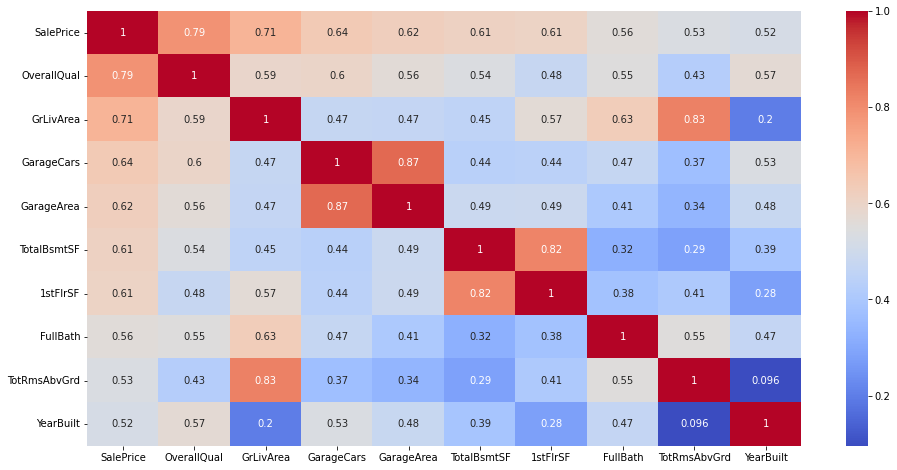

In [11]:
# Create a heatmap for the 10 features which best correlate with SalePrice
# cols = corrmat.nlargest(10, 'SalePrice').index
# sns.heatmap(corrmat.loc[cols,cols], ...)

correlations = housePricesDF.corr()

topTenCols = correlations.nlargest(10, 'SalePrice').index
topTenCors = housePricesDF[topTenCols].corr()
display(topTenCors)
sns.heatmap(topTenCors, annot=True, cmap='coolwarm')

# sns.heatmap(correlations.loc([topTenCols, topTenCols]))






As you can see, several of the top features are strongly correlated (coefficient > 0.8) with each other, not just <i>SalePrice</i>:
* The number of cars that fit into a garrage is correlated with said garage's surface area
* The number of rooms above ground correlates with the livable surface area above ground
* The basement's surface area correlates tightly with the 1st floor's

The correlation isn't perfect, but there's still a lot of redundant information in these pairs. Thus, for the sake of this exercise, we will continue our analysis with the following features:
    
    SalePrice, OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt

# Digging Deeper: Missing Data and Outlier Detection

Investigate if there are any missing values in the listed features, by chaining the <b>.isnull()</b> and <b>.sum()</b> dataframe methods.


In [149]:
# Check how many entries are missing for the selected features
featuresList = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

featuresDF= housePricesDF[featuresList]
featuresCorr = featuresDF.corr()

featuresDF


# sns.heatmap(featuresCorr, annot=True)

featuresDF.isnull().sum()


30

Null values can be safely ignored or huge hindrances, depending on the type of analysis you're performing.

We will perform Ordinary Least Squares (OLS) Regression later on, which would be hindered by missing data. Thus, we're going to try and estimate how many cars fit in each garage, filling in the null values.

We know <i>GarageCars</i> correlates with another variable. How would you use this correlation to estimate the missing values?

***
```
Answer:
We know that GarageCars positevely correlates with GarageArea at a coefficient of r = 0.87. So intution would suggest we reverse the formula and solve for every GarageCars value, however the correlation coefficient is unitless and based on the covariance of all items together. Thus I don't think we can use it to predict a specific variable based on another one. For that, we should use a linear regression β

```
***

Inspect what value <i>GarageArea</i> has for different amounts of <i>GarageCars</i> in a manner you see fit.

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

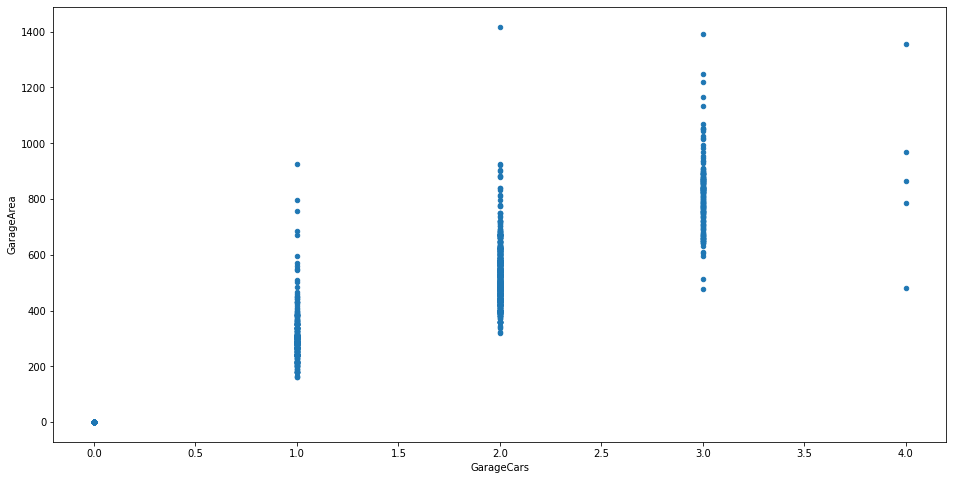

In [13]:
garageCols = ['GarageCars', 'GarageArea']

garageDF = housePricesDF[garageCols]

garageDF.plot.scatter(x='GarageCars', y='GarageArea')



What's the distribution of <i>GarageArea</i> for which <i>GarageCars</i> is null?

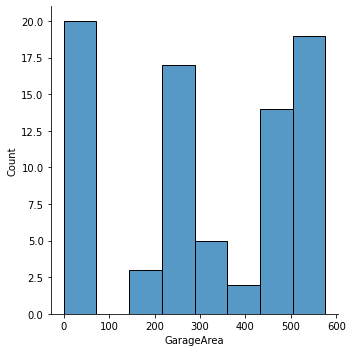

In [14]:
areaForNullCars = housePricesDF.loc[housePricesDF['GarageCars'].isnull() == True]['GarageArea']

sns.displot(areaForNullCars)

# nullRows = garageDF.loc[garageDF['GarageCars'] == 0]

# sns.displot(nullRows['GarageArea'])
# nullRows

Compare the distributions of <i>GarageArea</i> between the houses with known versus unknown <i>GarageCars</i>. Think of a way to estimate one from the other, implement and explain it, and fill in the missing values in your dataframe.

In [217]:
# Fill in the missing GarageCars values in df_houseprices
areaForKnownCars = housePricesDF.loc[housePricesDF['GarageCars'].isnull() == False]['GarageArea']

# sns.displot(areaForKnownCars)
# sns.displot(areaForNullCars)
definedData = housePricesDF.loc[housePricesDF['GarageCars'].isnull() == False][['GarageArea','GarageCars']]

housePricesDF[['GarageCars', 'GarageArea']]

x = definedData['GarageArea'].to_numpy().reshape((-1, 1))
y = definedData['GarageCars'].to_numpy()

model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

undefinedData = housePricesDF.loc[housePricesDF['GarageCars'].isnull() == True]
# print(len(undefinedData))
predictions = model.predict(undefinedData[['GarageArea']])
print(predictions)

# print(undefinedData[['GarageCars']])
# print(len(predictions))
undefinedData['GarageCars'] = predictions
fixedDF = housePricesDF.fillna(undefinedData)
# fixedDF['GarageCars']
# fix
# print(len(undefinedData))
# print(housePricesDF['GarageCars'].isnull().sum())

# fixedDF = housePricesDF.fillna(predictions)
# fixedDF.loc[fixedDF['GarageCars'].isnull() == True][['GarageCars', 'GarageArea']]

coefficient of determination: 0.7596177526516161
[1.99827767 1.73148749 1.79212162 1.80424845 1.75574114 0.95840232
 2.08316545 1.79212162 1.90126306 2.08316545 1.2282242  1.18578031
 1.95583377 2.07103862 1.15546325 2.08316545 1.06451205 1.09482911
 1.15849495 1.80424845 1.6920753  2.02253132 1.84669234 1.08270229
 0.33690248 1.67085336 1.86488258 2.08316545 0.33690248 1.93764354
 1.90126306 2.07103862 2.08316545 1.79212162 2.04981668 2.08316545
 1.21003396 1.80424845 1.79212162 2.08316545 2.02859473 1.00387792
 1.90126306 1.63144117 1.82243869 1.23731932 1.19487543 1.06451205
 0.33690248 1.67085336 1.56474363 0.33690248 0.33690248 0.33690248
 1.06451205 1.16455837 1.09482911 0.33690248 0.88260966 1.21003396
 1.13727301 1.21003396 0.33690248 0.33690248 0.33690248 0.88260966
 0.33690248 1.06451205 0.33690248 0.33690248 0.99175109 0.33690248
 0.99175109 1.10089253 0.33690248 0.33690248 0.33690248 0.33690248
 0.33690248 0.33690248]


Confirm there are no more missing values for <i>GarageCars</i>.

In [221]:
fixedDF['GarageCars'].isnull().sum()

0

The data might also contain outliers. Not all methods are equally susceptible to outliers, but it's important to identify them nonetheless. In general, removing outliers from data will improve the performance of models trained on said data.

Scatter plot <i>SalePrice</i> against <i>GrLivArea</i> and see for yourself.

The four points with the highest <i>GrLivArea</i> appear to be isolated, compared to the rest of the feature's values. Two look like they might be outliers. Which ones, and why?

***
```
Answer:


```
***


Print all available data for the two possible outliers.

Does anything stand out to explain why these houses are outliers?

***
```
Answer:


```
***

We'll want to remove these houses from our dataset before training any models, so <b>.drop()</b> them from the dataframe.

In [16]:
# to_drop = df_houseprices.index[df_houseprices['GrLivArea'] > ...]
# df_houseprices.drop(to_drop, inplace=True)

Repeat the steps you've taken for <i>TotalBsmtSF</i>.
1. Make a scatterplot,
2. investigate possible outliers, and
3. decide whether or not to drop the points.

# Towards Testing: Data Transformation and Feature Derivation

Before we go any further, you should know the basics of four key concepts, assumptions about which having significant consequences to whether or not certain statistical methods are appropriate to apply. The book [Multivariate Data Analysis](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503) by Hair et al. introduces them as follows:

* <b>Normality</b> - When we talk about normality, we mean that the data should follow a normal, Gaussian distribution: the characteristic "bell curve." Many statistical analyses (e.g. t-tests, ANOVA, simple regression) assume a normal distribution, so in case the data follows a different one, they must be transformed, or analysed with methods appropriate for the observed distribution.<br><br>

* <b>Homoscedasticity</b> - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503). In other words, the variance (and standard deviation) should be equivalent across your features. If this is not the case (i.e. the data is <i>hetero</i>scedastic), mathematical and computational treatment of the data becomes much trickier. Failing to notice your data is heteroscedastic can cause you to overestimate the <i>goodness of fit</i> of a model, e.g. Pearson's correlation coefficient.<br><br>

* <b>Linearity</b> - A common way to assess linearity is to examine scatter plots and search for linear patterns visually. If patterns are not linear, it is worth considering data transformation, or non-parametric testing. The scatter plots we've seen thusfar appear to have mostly linear relationships, so we'll not pay it further attention.<br><br>

* <b>Absence of correlated errors</b> - Linear regression models, along with many other statistical methods, explicitly assume that errors are independent. Correlated errors, like the name suggests, break this assumption. Autocorrelation most often occurs in time series data, but should not be an issue here.<br><br>

At the start of this notebook, you made a distribution plot for <i>SalePrice</i>. Produce the same plot in the next cell, but add a normal distribution fitted to the data along with it.

Hint: Use the <i>fit</i> keyword argument.

In [17]:
# Make a distribution plot for SalePrice with a fitted normal distribution

A different way of visualizing how well data follows a normal distribution, is through a probability plot. Draw one for <i>SalePrice</i>. Refer to your cheatsheet for the correct syntax.

The theoretical quantiles are distributed in such a way, that if the data is normally distributed, it will follow the red line. Does <i>SalePrice</i> look to follow a normal distribution?

***
```
Answer:


```
***

Positive (right) skew can sometimes be solved by log-transforming data. Add a column <i>LogSalePrice</i> with log-transformed prices to your dataframe and draw a new distribution plot.

In [18]:
# df_houseprices['LogSalePrice'] = ...

Also draw the probability plot of your log-transformed values.

If all went well, your new feature should now be normally distributed, which is one of the assumptions of the statistical method we want to apply.

Repeat this process for two more of our quantitative variables: <i>GrLivArea</i> and <i>TotalBsmtSF</i>.

First, draw a probability plot for <i>GrLivArea</i>.

In [19]:
# Draw a probability plot for GrLivArea

We appear to be dealing with more positive skew. As before, add a log-transformed column <i>LogGrLivArea</i> to your dataframe and redraw the probability plot.

In [20]:
# Draw a probability plot for LogGrLivArea

It is immediately obvious the log-transformed values follow the normal distribution more nicely than the untransformed ones. Try again, this time with <i>TotalBsmtSF</i>.

In [21]:
# Draw a probability plot for TotalBsmtSF

Do we see the same thing happening here, or is something else going on?

***
```
Answer:

```
***

<i>Log(0)</i> does not exist, so log-transformation will not fix this. We'll try something else.

One possible solution is to collapse our quantitative feature into a qualitative one, e.g. categorizing it into basements that are absent / small / medium / large. Even simpler would be to classify if a house does or does not have a basement at all.

Draw a distribution plot for <i>TotalBsmtSF</i> to help decide which of these options makes more sense.

Aside from the basements with a surface area of 0, there is only one clear peak in the distribution (albeit with a shoulder). Declaring arbitrary thresholds for size categories makes little sense here, so we'll add a boolean feature to describe whether or not a house has a basement at all.

Add such a column to your dataframe, with the label <i>HasBsmt</i>.

In [22]:
# df_houseprices['HasBsmt'] = ...

We should check how our new feature relates to our sale prices. <i>HasBsmt</i> is categorical, so a boxplot is appropriate.

Should we use <i>SalePrice</i> or <i>LogSalePrice</i> on the y axis? Explain why in a comment.

Does having a basement correlate with sale price? Is there enough difference between the categories?

***
```
Answer:

```
***

An added benefit of normalizing our data with log-transformation, is that it's gotten rid of some heteroscedasticity.

Draw two scatter plots: 
1. <i>GrLivingArea</i> vs. <i>SalePrice</i>
2. <i>LogGrLivingArea</i> vs. <i>LogSalePrice</i>

Compare the two scatter plots to one another. What stands out to you? How would you describe the shape of the clouds?

***
```
Answer:


```
***

Note the point density of the first cloud is inversely proportional to the distance along the axes: the cloud gets thinner at high values, and the average distance to an imaginary trendline increases. This indicates the plotted features are <i>not</i> homoscedastic, unlike the manner in which points are distributed in the log-transformed plot. 

# Putting it all Together: Training a Regression Model

Combining everything we know about the features we've investigated, transformed and derived, with respect to their relation to a house's sale price, we are now going to train an Ordinary Least Squares (OLS) regression model to predict these prices.

Running the next cell will split the relevant columns of your dataframe into a training and test set.

In [23]:
features = ['OverallQual','LogGrLivArea','GarageCars','FullBath','YearBuilt','HasBsmt']

X = df_houseprices[features]
y = df_houseprices['LogSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70%:30%

NameError: name 'df_houseprices' is not defined

Instantiate a LinearRegression model object, fit the training data to it, and print the model's performance score on the training data. Refer to your cheatsheet for the correct syntax.

In [ ]:
# Instantiate and fit a linear regression model, then print its score

# model = LinearRegression()
# model.fit(...)
# print model.score(...)

For regression models, the <b>.score()</b> method returns the coefficient of determination, also known as 'R squared' (R²). It reflects the proportion of variance explained by your model. For example, an R² of 0.80 means our model explains 80% of the variance in <i>LogSalePrice</i>.

Also check the model's R² for the <i>test</i> set. Do you expect it to be better, worse, or unchanged compared to the performance on training data? Why?

<i>Bonus question: rerunning the previous two cells will cause the score to change slightly. Why?</i>

Finally, lets visualize what this R² really means.

Use the <b>.predict()</b> method to add a column labeled <i>LogPredSalePrice</i> to your dataframe.

In [ ]:
# df_houseprices['LogPredSalePrice'] = model.predict(...)

The cell below will plot your predicted prices versus the actual ones, with a red line on the diagonal. The closer the points are to the line, the better your predictions.

In [ ]:
ax = df_houseprices.plot.scatter(x='LogPredSalePrice',y='LogSalePrice')
plt.plot([10,14],[10,14],'r')
plt.axis([10,14,10,14])
ax.set_aspect('equal')

In addition to this scatter plot, let's plot a distribution of the errors. Subtract <i>LogSalePrice</i> from <i>LogPredSalePrice</i> and visualize the result as you see fit.

Finally, add a column </i>PredSalePrice</i> to your dataframe.

Take the exponent of your predicted sale prices to undo taking the logarithm, and scatter plot it against the original <i>SalePrice</i>.

# Freeform Exercise

An R² of approximately 0.80 is nothing to sneeze at, but as should be evident from the plot above, there is still plenty of room for improvement. We've given you this exercise as a framework to explore the basics, but now that you're familiar with these first steps, you have the tools necessary to explore further on your own. Add cells to this notebook to improve your analysis of the data, refine your model, and see if you can get better predictions. To get you started:

Did you notice the 3 points on the far end of <i>TotalBsmtSF</i> that look like they might be outliers?

Use `zip(features, model.coef_)` to inspect the coefficients each feature is assigned by the regression model. Do these weights make sense to you? Do they agree with the correlation coefficients based on which we originally selected them?

Consider adding or removing other features from the dataset to the set you train your model on, or transforming/normalizing them.

Perhaps try a completely different model.

Explore!

# Credits

Adapted by Bas Stringer from material provided by [Scamander](https://www.scamander.com), in turn derived from Pedro Marcelino's [Kaggle kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python). Original data from ([De Cock, 2011](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)).